In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Input, Model
from keras.layers import Dense
from keras.utils.np_utils import to_categorical


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load data

sklearn 를 이용하여 make_moons 데이터를 불러온다.

make moons data는 좌표를 이용하여 빨간점과 보라색점을 classfication 해야하는 문제이다. 

X는 inputdata이며, y는 label data이다. 

y의 값이 0이면 빨간색점, 1이면 보라색점이다. 

In [2]:
X, y=sklearn.datasets.make_moons(2000, noise=0.2)

### Matplot

라이브러리를 사용하여 데이터를 시각화 한다. 

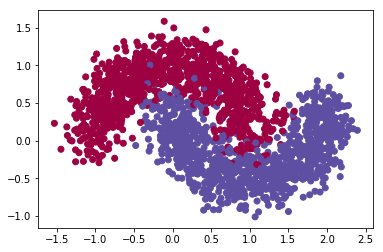

In [3]:
import matplotlib.pyplot as plt # matplot import

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.show()



In [4]:

#0: red, 1:pruple
print(X[0])
print(y[0])

[-0.39079561  0.86362318]
0


In [5]:
# 데이터분류 시각화 함수
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [6]:
from keras.utils.np_utils import to_categorical

y_binary=to_categorical(y)


print(y)

print("binary is ",y_binary)# 0,1 : red , 1,0 purple

[0 1 0 ... 1 0 1]
binary is  [[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


### deep learning model

Sequential 함수를 사용하여 딥러닝 모델을 만든다.

.add 로 dense한 딥러닝 레이러를 블락처럼 추가 시킨다. 


input_dim : 인풋 노드의 갯수 

activation: activation 함수 지정

앞의 숫자 : 아웃풋 노드의 갯수 

이며 model.summary() 함수를 통하여 레이어 타입, 아웃풋 모양, 파라미터의 갯수를 볼 수 있다.



In [7]:
from keras.models import Sequential

from keras.layers import Dense

model=Sequential()

model.add(Dense(10, input_dim=2, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.summary()


'''

if I want fix shape of X
x_input=Input(shape=(2,))
x = Dense(10, activation="relu)

'''



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


'\n\nif I want fix shape of X\nx_input=Input(shape=(2,))\nx = Dense(10, activation="relu)\n\n'

In [8]:
#Input 함수를 사용하여 shape 정하기 



'''
from keras.models import Input, Model
from keras.layers import Dense
#if I want fix shape of X

x_input=Input(shape=(2,))
x = Dense(10, activation="relu")(x_input)

x=Dense(10, activation="relu")(x)

out=Dense(units=2, activation="softmax")(x)

model=Model(inputs=x_input, outputs=out)
model.summary()
'''

'\nfrom keras.models import Input, Model\nfrom keras.layers import Dense\n#if I want fix shape of X\n\nx_input=Input(shape=(2,))\nx = Dense(10, activation="relu")(x_input)\n\nx=Dense(10, activation="relu")(x)\n\nout=Dense(units=2, activation="softmax")(x)\n\nmodel=Model(inputs=x_input, outputs=out)\nmodel.summary()\n'

## compile


모델을 만든 뒤,

Loss, optimizer, metrics 를 지정해주기 위해 .compile() 함수로 지정해준다. 

In [9]:
from keras.optimizers import Adam
#compile

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01, beta_1=0.5), metrics=['accuracy'])



### training 

model.fit( ) 함수를 사용하여 트레이닝을 시킨다. 



Epoch 1/1
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2256 - acc: 0.9145


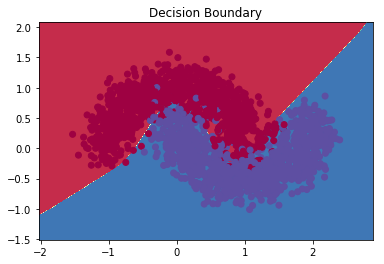

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1267 - acc: 0.9485


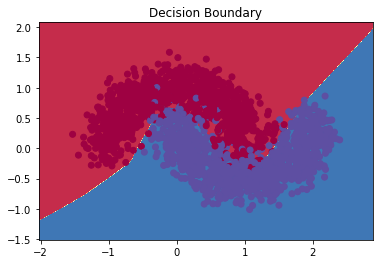

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1239 - acc: 0.9605


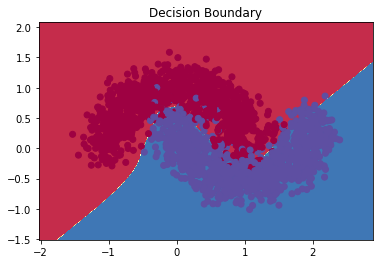

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1222 - acc: 0.9575


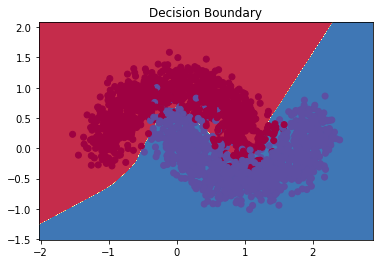

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1167 - acc: 0.9540


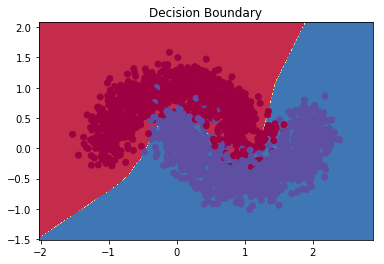

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1247 - acc: 0.9580


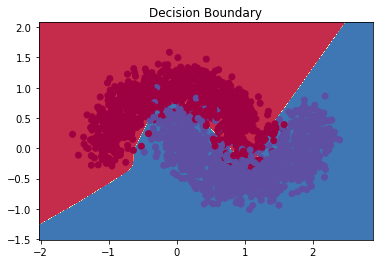

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1072 - acc: 0.9600


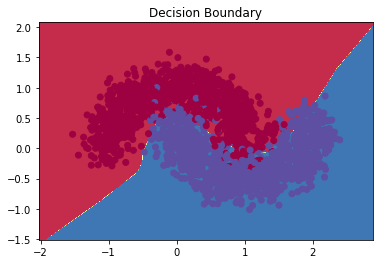

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1075 - acc: 0.9620


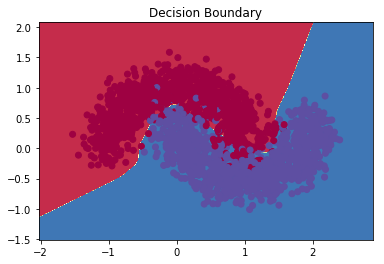

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1158 - acc: 0.9590


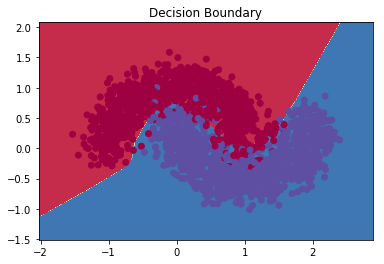

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1125 - acc: 0.9600


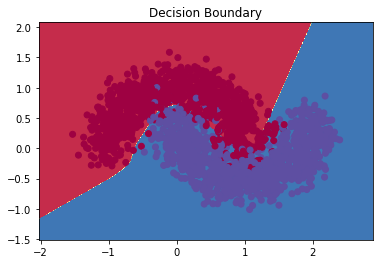

In [10]:
#training

#model.fit(X,y, epochs = 100, batch_size = 50, verbose = 0)


for i in range(10):

    #train model
    model.fit(X,y_binary, epochs=1, batch_size=1)
    
    plot_decision_boundary(lambda x: model.predict(x, batch_size=2000).argmax(axis=1))
    
    plt.title("Decision Boundary")
    plt.show()